# Topic Modelling

Técnica de clasificación de documento no supervisada para agruparlos por temáticas similares.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups   #NLTK, gensim, 
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


from numpy.linalg import svd

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
docs    = dataset.data
len(docs)

unable to import 'smart_open.gcs', disabling that module


11314

In [ ]:
print(dataset.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
df = pd.DataFrame({'documentos':docs})

In [ ]:
STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [ ]:
df['doc_limpio'] =  df['documentos'].str.replace("[^a-zA-Z#]", " ")
df['doc_limpio']  = df['doc_limpio'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]).lower() )
df['doc_limpio']  = df['doc_limpio'].apply(lambda x: ' '.join([w for w in x.split() if w not in STOPWORDS]))

In [ ]:
df

,documentos,doc_limpio
0,Well i'm not sure about the story nad it did s...,Well i m not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",Yeah do you expect people to read the ...
2,Although I realize that principle is not one o...,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ...",Well I will have to change the scoring on my ...
...,...,...
11309,"Danny Rubenstein, an Israeli journalist, will ...",Danny Rubenstein an Israeli journalist will ...
11310,\n,
11311,\nI agree. Home runs off Clemens are always m...,I agree Home runs off Clemens are always me...
11312,I used HP DeskJet with Orange Micros Grappler ...,I used HP DeskJet with Orange Micros Grappler ...


## Vectorización

Para transformar los documentos en vectores hay por lo menos dos opciones. Una es el conteo de cada token en los documentos. Y otra es usando ``tf-idf`` (*Term Frequency - Inverse Document Frequency*)

$$
\operatorname{tf}(t,d) = 0.5 + 0.5\frac {f_{t,d}} {\max \{ f_{t',d} : t' \in D\}}
$$

y 

$$
\operatorname{idf}(t,D)  = \log \left(\frac {|D|} {1+ |\{d \in D : t \in D \} |} \right)
$$

entonces el _score_ por término es

$$
\operatorname{tf-idf}(t,d,D) = \operatorname{tf}(t,d) \times \operatorname{idf}(t,D)
$$

Vean el ejemplo en [Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Example_of_tf%E2%80%93idf)

In [ ]:
#vectorizador = CountVectorizer(stop_words='english', max_features=1000)
vectorizador = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
X            = vectorizador.fit_transform(df['doc_limpio'])
X

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 280889 stored elements in Compressed Sparse Row format>

In [ ]:
Xa  = X.toarray()
Xa[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.12842145, 0.     

In [ ]:
Xa.shape

(11314, 1000)

In [ ]:
u, s, vt = svd(Xa, full_matrices=False)

In [ ]:
u.shape

(11314, 1000)

In [ ]:
vt.shape

(1000, 1000)

In [ ]:
s.shape

(1000,)

In [ ]:
reconstruye = lambda p,s,q,n : np.dot( 
                                      np.dot(p[:,:n], np.diag(s[:n])), 
                                      q[:n])

recomp = reconstruye(u,s,vt,1000)
recomp.shape


(11314, 1000)

In [ ]:
np.allclose(Xa, recomp)

True

<AxesSubplot:>

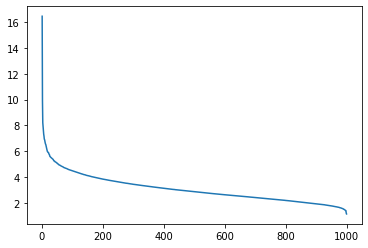

In [ ]:
sns.lineplot(x=range(1,len(s)+1), y=s)

<AxesSubplot:>

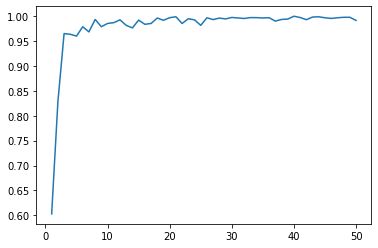

In [ ]:
w = [s[i+1]/s[i] for i in range(len(s)-1)]
sns.lineplot(x = range(1,51), y=w[:50])

In [ ]:
R = reconstruye(u,s,vt, 10)
R.shape

(11314, 1000)

In [ ]:
terms = vectorizador.get_feature_names()
len(terms)

1000

In [ ]:
print(df.iloc[2032]['doc_limpio'])

deletions deletions presented argument incredulity seen presented manner usually presented form offered convincing explanation unreasonable explanation phenomena theism provide convincing explanation argument theism favor especially different theisms offer different explanations different adherents purportedly theism different explanations experience experience common reason lack evidence theism favor mileage vary heck snide fairly easy attack arguments strawmen sage advice sincerely raymond ingles ingles engin umich


In [ ]:
vector = vectorizador.transform(['[deletions] [deletions] presented argument incredulity. however, seen, presented manner. usually presented form, "and *besides*, see... ...nor offered convincing explanation." moreover, unreasonable explanation phenomena. theism provide convincing explanation argument theisms favor. especially different theisms offer different explanations, different adherents purportedly theism different explanations... experience. experience, common reason lack evidence theisms favor. mileage vary. heck, ill snide once. its fairly easy attack arguments made. (i.e. strawmen.) sage advice indeed. sincerely, raymond ingles ingles@engin.umich.edu'])
varr   = vector.toarray()
varr.shape

(1, 1000)

In [ ]:
dh = np.dot(recomp, varr.T)
np.round(dh, decimals=3)

array([[0.019],
       [0.   ],
       [0.027],
       ...,
       [0.   ],
       [0.   ],
       [0.056]])

In [ ]:
p = np.argsort(dh.reshape(1,-1))
p[0][-5:]

array([ 7750,   123,  9528, 10964,  2032])

In [ ]:
print(df.iloc[10964]['doc_limpio'])

different classes competetors total purse billion billion depending different classes auto racing motocycle racing


In [ ]:
print(df.iloc[9528]['doc_limpio'])

think powerbooks upgrade upgrades different


In [ ]:
k = 10
vocab = vectorizador.vocabulary_
for i, componente in enumerate(vt):
    vocab_comp = zip(terms, componente)
    jerarquia_temas = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:k] 
    print(u"Tópico {}".format(i))
    for temas in jerarquia_temas:
        print("\t {} {}".format(temas[0], temas[1]))
    print("*"*50)

Tópico 0
	 like 0.2187214441622795
	 know 0.20539694791465382
	 people 0.19706885315764713
	 think 0.18158385084672457
	 good 0.1540053299947898
	 time 0.1471478473655058
	 thanks 0.11988281130834971
	 right 0.10971498473108103
	 want 0.1063124198670799
	 need 0.10365327627370104
**************************************************
Tópico 1
	 thanks 0.3385215641768687
	 windows 0.2952955229391379
	 card 0.18304780357692318
	 drive 0.1774166656100761
	 mail 0.155453972599695
	 file 0.14791318226713454
	 advance 0.12789832146750602
	 files 0.11576818804411525
	 software 0.11326823200787059
	 program 0.10536086246746798
**************************************************
Tópico 2
	 game 0.3699975251808922
	 team 0.3225367624030376
	 year 0.28219659015951315
	 games 0.2532174544144084
	 season 0.1828113035053656
	 players 0.1595430885699968
	 good 0.1564717960454395
	 play 0.15034786327372673
	 hockey 0.13623865172061173
	 drive 0.12441309914906803
********************************************

Tópico 55
	 graphics 0.23849497927376942
	 look 0.22297653153128905
	 help 0.18809886726443217
	 line 0.16730053481501173
	 actually 0.16287942423352753
	 best 0.15926858332227356
	 data 0.13263068863931754
	 believe 0.1317330092395229
	 speed 0.13076833388977413
	 list 0.10978895639475812
**************************************************
Tópico 56
	 article 0.24440849492133782
	 data 0.2067300411689077
	 price 0.18813020717579906
	 information 0.1634571259612632
	 monitor 0.16001934725837624
	 true 0.11028063893667536
	 believe 0.10424308479852466
	 question 0.09470470438542739
	 things 0.09189359335969041
	 science 0.08746235973613875
**************************************************
Tópico 57
	 post 0.46580889374610923
	 anybody 0.24136249436266705
	 price 0.21113363090566586
	 mouse 0.12126210232321276
	 data 0.11877966561932157
	 driver 0.11567095456785138
	 look 0.11305097774713574
	 true 0.10202932808985263
	 info 0.0994007993180401
	 state 0.0805883831207183
*****************

	 cars 0.12846146043467535
	 order 0.12378782256759402
	 condition 0.11965635693438087
	 trying 0.11112735754367432
	 agree 0.1100270157053119
**************************************************
Tópico 157
	 mode 0.19267621644602337
	 love 0.15679696138289478
	 ground 0.12452457887183103
	 home 0.1156342477451619
	 change 0.1144840228991358
	 test 0.11237519204940812
	 john 0.11135457384402252
	 hockey 0.10708379595535857
	 public 0.10367454942748579
	 times 0.09808329412768145
**************************************************
Tópico 158
	 machine 0.22249184666909974
	 hockey 0.20553406284007603
	 pretty 0.15449720754260082
	 order 0.14520694123760122
	 bible 0.12195140733763697
	 nice 0.11541010474239363
	 support 0.11455830559491603
	 running 0.10703361894727507
	 advance 0.10547767854215427
	 based 0.10381888503803464
**************************************************
Tópico 159
	 different 0.18736026898166733
	 yeah 0.17876528616087192
	 university 0.15051326559829462
	 posting 0.1

	 instead 0.1542517346271248
	 nasa 0.1495879712492489
	 pain 0.14021101196877775
	 assume 0.13934381721682326
	 sounds 0.1281386943465813
	 dave 0.12349461687775806
	 exist 0.11746009482197486
	 questions 0.11149489372161095
	 jews 0.10864740964610024
	 size 0.10153988910110813
**************************************************
Tópico 248
	 area 0.14398859361535493
	 controller 0.14391312580998955
	 claim 0.1390015949281457
	 pain 0.13428090281365376
	 company 0.1313434037055332
	 access 0.1249852512672186
	 exactly 0.12475121590232047
	 usually 0.11483181636957818
	 folks 0.10738660722974379
	 able 0.10714073606557083
**************************************************
Tópico 249
	 area 0.17073128558886544
	 reading 0.16442106654425723
	 face 0.15794113144971733
	 radio 0.1323318542723463
	 pain 0.11061986435700927
	 city 0.10030830989337289
	 copy 0.09802378731067837
	 wonder 0.09631687781366197
	 answer 0.09406179577187859
	 insurance 0.09167389311389341
****************************

	 week 0.10556688428962088
**************************************************
Tópico 354
	 told 0.14067589359737
	 somebody 0.13731405995715854
	 usually 0.13489165752489626
	 asked 0.11680633196500952
	 widget 0.11343738233092251
	 dave 0.10693139500313627
	 miles 0.10602545631495641
	 simply 0.09981547649954682
	 death 0.09904968423594972
	 driving 0.09533865759837303
**************************************************
Tópico 355
	 consider 0.17430178038539673
	 somebody 0.14047913360326245
	 freedom 0.13147909958244203
	 working 0.12468130921360084
	 michael 0.1114600571067089
	 design 0.10439337110591869
	 goes 0.10068241531435927
	 states 0.09873615608309119
	 lord 0.09423625556043345
	 similar 0.09220874328840568
**************************************************
Tópico 356
	 programs 0.1485407990885779
	 gets 0.11555389717733645
	 head 0.11377669342469673
	 death 0.1122781848432822
	 feel 0.1048222015057154
	 disease 0.10401443032081348
	 thinking 0.09770333312451218
	 somebody 0

	 certain 0.10398208571787963
	 internal 0.10199790287851279
	 canada 0.10099674924644499
	 story 0.10066948139041476
**************************************************
Tópico 447
	 stop 0.13795030557078086
	 early 0.1349257689475125
	 write 0.10228663179570133
	 cases 0.09727586682469769
	 media 0.09548823816175446
	 service 0.09475719948609396
	 live 0.09361183246250791
	 wasn 0.09330752401025977
	 models 0.0919499362339989
	 cover 0.0866866010373304
**************************************************
Tópico 448
	 class 0.15121315664295337
	 network 0.13863397550275766
	 smith 0.12342478764477534
	 medical 0.12288591048484929
	 uses 0.11485050141752284
	 main 0.11211431319444543
	 needs 0.10915189165041869
	 aren 0.09917415369035582
	 logic 0.09387685686933618
	 includes 0.09232024742870316
**************************************************
Tópico 449
	 pick 0.14533561935221567
	 text 0.13279959746433298
	 common 0.1084807102597066
	 happened 0.10699975013544841
	 religious 0.09864639

Tópico 518
	 completely 0.1689481814830228
	 request 0.1567282033797434
	 white 0.12402195482088849
	 traffic 0.11289409612477609
	 export 0.11009998156268158
	 chance 0.10945409465934433
	 crime 0.09836978853756556
	 average 0.09757919239989435
	 internal 0.09258657202253177
	 colorado 0.0842664647528999
**************************************************
Tópico 519
	 business 0.1232202807710592
	 reference 0.10976391673424697
	 took 0.10699780261237839
	 event 0.10470097859496555
	 pittsburgh 0.10284356840918009
	 federal 0.09892595195902583
	 forget 0.0971650534050816
	 market 0.09587997518277092
	 playing 0.0942125027712622
	 canada 0.09065596385543606
**************************************************
Tópico 520
	 peter 0.13343130940760078
	 details 0.11747046658759273
	 double 0.11023638824714681
	 door 0.10348930544166803
	 title 0.09935548652220717
	 father 0.09933281982726154
	 object 0.09047682761396558
	 interface 0.09009622007065388
	 average 0.08948416978537978
	 choice 0.0

Tópico 612
	 appears 0.1898944010495691
	 situation 0.12156125926691312
	 major 0.11320758705515145
	 quote 0.11081690846285984
	 single 0.10978758462844347
	 shall 0.10213690430951386
	 played 0.09666374051447384
	 service 0.09082323533420966
	 understanding 0.08805889244220698
	 recent 0.08702727045521035
**************************************************
Tópico 613
	 perfect 0.15126003478299477
	 page 0.13487905468478553
	 accept 0.12491474680848369
	 played 0.11315173549839026
	 interface 0.10677700561573732
	 coming 0.1021340366011229
	 bits 0.0974095376676486
	 gone 0.09606339262614805
	 total 0.09492385189287961
	 project 0.09474851425631282
**************************************************
Tópico 614
	 groups 0.1439915871706472
	 accept 0.13265860801350757
	 washington 0.12660691511447283
	 complete 0.1083787530249169
	 faster 0.0998159660175342
	 bring 0.09911442307354712
	 played 0.09795517355704102
	 particular 0.09401730032534414
	 misc 0.08921140226843201
	 costs 0.087997

Tópico 689
	 account 0.16527454555658472
	 offers 0.13763504125322848
	 europe 0.12131508231916772
	 goal 0.11875871563965262
	 heaven 0.11606314087070624
	 stay 0.11170904526084974
	 california 0.10349934410177483
	 created 0.09884686767701417
	 increase 0.0962892572061568
	 goals 0.09558400127416498
**************************************************
Tópico 690
	 atheists 0.1852105450844037
	 strong 0.14750349766816892
	 compatible 0.14226801875257278
	 expensive 0.1215766389122858
	 comment 0.11953218081456173
	 robert 0.11682587458858207
	 national 0.11184917703358667
	 discussion 0.10743997294873392
	 army 0.10061181450537283
	 paid 0.09616959755216106
**************************************************
Tópico 691
	 choose 0.12115245010317983
	 atheists 0.11416788576918013
	 protection 0.11299927497799025
	 understanding 0.11101990390541389
	 turkish 0.10932904760086909
	 costs 0.10490099948713487
	 published 0.10449519633255681
	 wire 0.0995239987390457
	 process 0.0908006674701175

	 increase 0.1178860124837609
	 directly 0.11166011996863831
	 fall 0.11064430417701032
	 mailing 0.10742019719713632
	 amendment 0.10456291661476202
	 americans 0.10228831151512502
**************************************************
Tópico 784
	 step 0.15246536100988708
	 policy 0.10975681917653683
	 effort 0.10737572081059703
	 giving 0.10690853398290154
	 particularly 0.10393738681528475
	 devices 0.10252028042257234
	 issues 0.09712281168683393
	 block 0.0970639858589997
	 living 0.08904219545412931
	 russia 0.08844941443095418
**************************************************
Tópico 785
	 functions 0.1416248346048485
	 strong 0.12263048890250158
	 killing 0.11097224936117678
	 search 0.10655983250510044
	 east 0.09802344250528425
	 action 0.09761668998158453
	 earlier 0.09643509906724286
	 takes 0.09639456450385563
	 involved 0.0914859255468353
	 articles 0.08835220878453247
**************************************************
Tópico 786
	 published 0.1345581472374771
	 compatible 0

Tópico 864
	 killing 0.21585480702719204
	 final 0.2157447785664621
	 answers 0.16179840935755369
	 specific 0.14491640254574756
	 suspect 0.12420422034473982
	 beliefs 0.10841230890677728
	 fairly 0.1046956286820348
	 east 0.10277108604109997
	 jobs 0.10106066048017824
	 worse 0.10064588204433403
**************************************************
Tópico 865
	 described 0.19978472887914625
	 russia 0.14864939764028656
	 events 0.1485600933117404
	 previous 0.1177825492593713
	 plan 0.11772323458778486
	 risk 0.11743935005713313
	 north 0.11736725458014995
	 speak 0.11311032981739715
	 march 0.11026362029837387
	 final 0.10498221163418082
**************************************************
Tópico 866
	 actual 0.20657354567268643
	 present 0.15164037938182987
	 modern 0.1424939803318348
	 arguments 0.1364768005800689
	 basic 0.12078997453668738
	 limited 0.11892145271112034
	 nature 0.1147875395050697
	 background 0.11254418088057222
	 risk 0.10722019970172655
	 rule 0.09854140296070786
*

Tópico 924
	 matthew 0.17966613426893305
	 messages 0.16300591937530515
	 vancouver 0.16134131184722772
	 administration 0.14011236475882938
	 calls 0.13360519599199308
	 allows 0.13188832313745505
	 continue 0.12050006295363691
	 practice 0.10828085701964077
	 secret 0.10718769964239552
	 secure 0.10550813822141626
**************************************************
Tópico 925
	 scientific 0.17485201165232236
	 physical 0.17302856770643327
	 decided 0.16274948766714417
	 reasons 0.14067124067518305
	 congress 0.13961009546299136
	 russian 0.13442628319546654
	 regular 0.11367519115061073
	 countries 0.10647361003063426
	 prove 0.10116598254081634
	 fully 0.09913309757504915
**************************************************
Tópico 926
	 majority 0.20203195429775156
	 basis 0.20076514796278427
	 electronic 0.1837456675960849
	 safe 0.1434864241468613
	 town 0.13416218158845866
	 arms 0.12725336881907134
	 congress 0.11702092453784672
	 physical 0.10974332252887709
	 step 0.1056441337483

Tópico 963
	 official 0.3524526954715357
	 additional 0.25090558750408937
	 exists 0.17561681494002715
	 developed 0.1601186870550448
	 contains 0.15045764633042744
	 mission 0.1327209328766272
	 studies 0.128024526802279
	 town 0.11261243566510236
	 privacy 0.11144003976650271
	 soldiers 0.10322032935651515
**************************************************
Tópico 964
	 resource 0.30544325594245797
	 developed 0.2730104972140938
	 allows 0.1996738831582249
	 attempt 0.1750366984564465
	 fully 0.14790348633544811
	 matthew 0.11697264507776294
	 existence 0.11539541350373253
	 studies 0.10379738435651452
	 secret 0.10207119966759864
	 soldiers 0.09330829732484083
**************************************************
Tópico 965
	 developed 0.38917539447572247
	 jpeg 0.3516985372418407
	 independent 0.20889453436712455
	 operation 0.15925161523601378
	 allows 0.14928831816493981
	 null 0.14230923356963537
	 contains 0.12573419225970672
	 secure 0.12495669266025992
	 administration 0.11298509

In [ ]:
len(vocab)

1000